In [33]:
import numpy as np
import cv2
import pandas as pd
img=cv2.imread('Covid2.png')
x_size=300
y_size=237
img=cv2.resize(img,(x_size,y_size))
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
df=pd.DataFrame()
img2=img.reshape(-1)
df['Original image']=img2
df.head()
df.info()
len(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71100 entries, 0 to 71099
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Original image  71100 non-null  uint8
dtypes: uint8(1)
memory usage: 69.6 KB


71100

In [34]:
    num = 1
    kernels = []
    for theta in range(2):
        theta = theta / 4. * np.pi
        for sigma in (1, 3):
            for lamda in np.arange(0, np.pi, np.pi / 4):
                for gamma in (0.05, 0.5):
#               print(theta, sigma, , lamda, frequency)
                
                    gabor_label = 'Gabor' + str(num)
#                    print(gabor_label)
                    ksize=5
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    #Now filter image and add values to new column
                    fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                    filtered_img = fimg.reshape(-1)
                    df[gabor_label] = filtered_img  #Modify this to add new column for each gabor
                    print(gabor_label,': theta=',theta,': sigma=',sigma,':lamda=',lamda,': gamma=',gamma)
                    num += 1
      ########################################
#Geerate OTHER FEATURES and add them to the data frame
#Feature 3 is canny edge
    edges = cv2.Canny(img, 100,200)   #Image, min and max values
    edges1 = edges.reshape(-1)
    df['Canny Edge'] = edges1 #Add column to original dataframe

    from skimage.filters import roberts, sobel, scharr, prewitt

#Feature 4 is Roberts edge
    edge_roberts = roberts(img)
    edge_roberts1 = edge_roberts.reshape(-1)
    df['Roberts'] = edge_roberts1

#Feature 5 is Sobel
    edge_sobel = sobel(img)
    edge_sobel1 = edge_sobel.reshape(-1)
    df['Sobel'] = edge_sobel1

#Feature 6 is Scharr
    edge_scharr = scharr(img)
    edge_scharr1 = edge_scharr.reshape(-1)
    df['Scharr'] = edge_scharr1

    #Feature 7 is Prewitt
    edge_prewitt = prewitt(img)
    edge_prewitt1 = edge_prewitt.reshape(-1)
    df['Prewitt'] = edge_prewitt1

    #Feature 8 is Gaussian with sigma=3
    from scipy import ndimage as nd
    gaussian_img = nd.gaussian_filter(img, sigma=3)
    gaussian_img1 = gaussian_img.reshape(-1)
    df['Gaussian s3'] = gaussian_img1

    #Feature 9 is Gaussian with sigma=7
    gaussian_img2 = nd.gaussian_filter(img, sigma=7)
    gaussian_img3 = gaussian_img2.reshape(-1)
    df['Gaussian s7'] = gaussian_img3

    #Feature 10 is Median with sigma=3
    median_img = nd.median_filter(img, size=3)
    median_img1 = median_img.reshape(-1)
    df['Median s3'] = median_img1

    #Feature 11 is Variance with size=3
    #variance_img = nd.generic_filter(img, np.var, size=3)
    #variance_img1 = variance_img.reshape(-1)
    #df['Variance s3'] = variance_img1  #Add column to original datafr

  




Gabor1 : theta= 0.0 : sigma= 1 :lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 :lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 :lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 :lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 :lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 :lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 :lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 :lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 :lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 :lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 :lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 :lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 :lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 :lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 :lamda= 2.35619449019234

In [35]:
labeled_img=cv2.imread('Covidlabel1.png')
x_size=300
y_size=237
labeled_img=cv2.resize(labeled_img,(x_size,y_size))
labeled_img=cv2.cvtColor(labeled_img,cv2.COLOR_BGR2GRAY)
labeled_img1=labeled_img.reshape(-1)
df['Labels']=labeled_img1
print(df.head())

   Original image  Gabor1  Gabor2  ...  Gaussian s7  Median s3  Labels
0              68       0       0  ...           70         68      19
1              68       0       0  ...           70         68      20
2              68       0       0  ...           71         68      20
3              68       0       0  ...           71         68      20
4              68       0       0  ...           72         68      21

[5 rows x 42 columns]


In [36]:
from sklearn.model_selection import train_test_split
Y=df['Labels'].values
X=df.drop(labels=['Labels'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.4, random_state=42) 

# **DecisionTreeClassifier**

In [37]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)
result=clf.predict(X)
print(result)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Train Accuracy:", metrics.accuracy_score(Y_train, clf.predict(X_train)))
Decision_ACC=metrics.accuracy_score(Y_test, y_pred)
print("Test Accuracy:",Decision_ACC)

print(cross_val_score(clf, X, Y, scoring="accuracy", cv = 7))
mean_score = cross_val_score(clf, X, Y, scoring="accuracy", cv = 7).mean()

print('Validation',mean_score)




[ 28  28  28 ...  33 128 128]
Train Accuracy: 0.947022972339428
Test Accuracy: 0.15323488045007033


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,


[0.0770821  0.10524761 0.1014079  0.09038102 0.07886187 0.07531752
 0.06822881]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,


Validation 0.08569634584186044


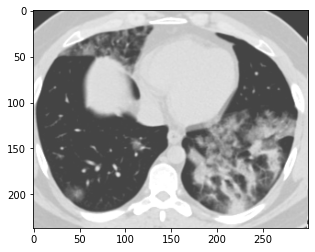

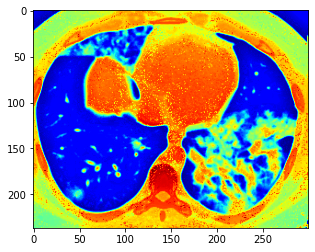

In [38]:

import cv2
from matplotlib import pyplot as plt
image1 = cv2.imread("Covid2.png")
#Show the image with matplotlib
plt.imshow(image1)
plt.show()
#result=clf.predict(X)
segmented=result.reshape((img.shape))
plt.imshow(segmented,cmap='jet')



# **RandomForestClassifier**

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model=RandomForestClassifier(n_estimators=10,random_state=42)
model.fit(X_train,Y_train)
prediction_test=model.predict(X_test)

print("Train Accuracy:", metrics.accuracy_score(Y_train, model.predict(X_train)))
Randomf_ACC=metrics.accuracy_score(Y_test, prediction_test)
print("Test Accuracy:",Randomf_ACC)
print(cross_val_score(model, X, Y, scoring="accuracy", cv = 7))
mean_score = cross_val_score(model, X, Y, scoring="accuracy", cv = 7).mean()
#std_score = cross_val_score(model, X, Y, scoring="accuracy", cv = 7).std()
print('Validation',mean_score)


Train Accuracy: 0.9385138302859822
Test Accuracy: 0.1308016877637131


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,


[0.07235676 0.09825736 0.09668209 0.08132323 0.07019789 0.0693118
 0.06635818]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,


Validation 0.079212473357387


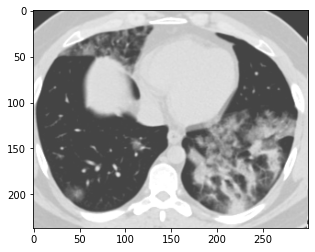

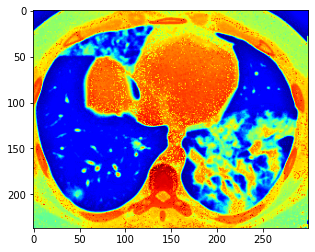

In [45]:
image2 = cv2.imread("Covid2.png")
#Show the image with matplotlib
plt.imshow(image2)
plt.show()
result1=model.predict(X)
segmented=result1.reshape(img.shape)
from matplotlib import pyplot as plt 
plt.imshow(segmented,cmap='jet')


# **linear_model**

In [46]:


from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from  sklearn.metrics import r2_score
from sklearn import metrics
reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)

prediction_test=reg.predict(X_test)
test_set_rmse = (np.sqrt(mean_squared_error(Y_test, prediction_test)))
test_set_r2 = r2_score(Y_test, prediction_test)
#print("Accuracy=",metrics.accuracy_score(Y_test,prediction_test))
print(test_set_rmse)
print(test_set_r2)
print("Train Accuracy:", r2_score(Y_train, reg.predict(X_train)))

print("Test Accuracy:",test_set_r2)
print( cross_val_score(reg, X_train, Y_train, scoring='r2', cv=5))
mean_score = cross_val_score(reg, X_train, Y_train, scoring='r2', cv=5).mean()

print('cross_Validation',mean_score)

10.656863117401757
0.9616166711025347
Train Accuracy: 0.9618732486507757
Test Accuracy: 0.9616166711025347
[0.96243223 0.96066235 0.96187509 0.9621094  0.96204004]
cross_Validation 0.9618238211487917


In [47]:
import pickle
filename='Prediction_Model'
pickle.dump(reg,open(filename,'wb'))

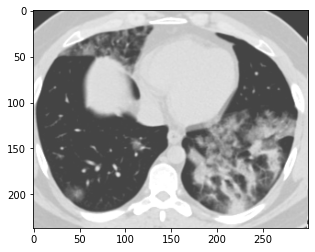

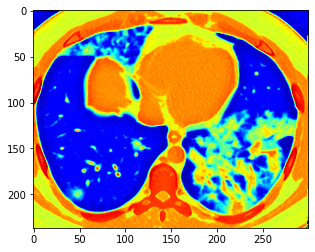

In [48]:
image3 = cv2.imread("Covid2.png")


#Show the image with matplotlib
plt.imshow(image3)
plt.show()
result=reg.predict(X)
segmented=result.reshape((img.shape))
from matplotlib import pyplot as plt 
plt.imshow(segmented,cmap='jet')
#image1 = cv2.imread("Covid2.png")

# **Testing a Lung images**

Gabor1 : theta= 0.0 : sigma= 1 :lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 :lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 :lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 :lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 :lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 :lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 :lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 :lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 :lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 :lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 :lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 :lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 :lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 :lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 :lamda= 2.35619449019234

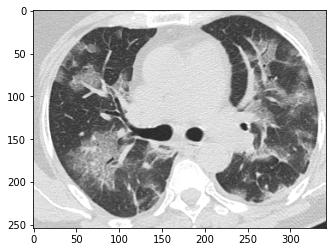

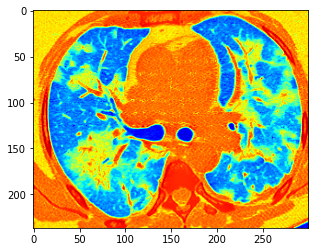

In [49]:
import numpy as np
import cv2
import pandas as pd

def  feature_extraction(img):
    df=pd.DataFrame()
    img2=img.reshape(-1)
    df['Original image']=img2
    num = 1
    kernels = []
    for theta in range(2):
        theta = theta / 4. * np.pi
        for sigma in (1, 3):
            for lamda in np.arange(0, np.pi, np.pi / 4):
                for gamma in (0.05, 0.5):
#               print(theta, sigma, , lamda, frequency)
                
                    gabor_label = 'Gabor' + str(num)
#                    print(gabor_label)
                    ksize=5
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    #Now filter image and add values to new column
                    fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                    filtered_img = fimg.reshape(-1)
                    df[gabor_label] = filtered_img  #Modify this to add new column for each gabor
                    print(gabor_label,': theta=',theta,': sigma=',sigma,':lamda=',lamda,': gamma=',gamma)
                    num += 1
      ########################################
#Geerate OTHER FEATURES and add them to the data frame
#Feature 3 is canny edge
    edges = cv2.Canny(img, 100,200)   #Image, min and max values
    edges1 = edges.reshape(-1)
    df['Canny Edge'] = edges1 #Add column to original dataframe

    from skimage.filters import roberts, sobel, scharr, prewitt

#Feature 4 is Roberts edge
    edge_roberts = roberts(img)
    edge_roberts1 = edge_roberts.reshape(-1)
    df['Roberts'] = edge_roberts1

#Feature 5 is Sobel
    edge_sobel = sobel(img)
    edge_sobel1 = edge_sobel.reshape(-1)
    df['Sobel'] = edge_sobel1

#Feature 6 is Scharr
    edge_scharr = scharr(img)
    edge_scharr1 = edge_scharr.reshape(-1)
    df['Scharr'] = edge_scharr1

    #Feature 7 is Prewitt
    edge_prewitt = prewitt(img)
    edge_prewitt1 = edge_prewitt.reshape(-1)
    df['Prewitt'] = edge_prewitt1

    #Feature 8 is Gaussian with sigma=3
    from scipy import ndimage as nd
    gaussian_img = nd.gaussian_filter(img, sigma=3)
    gaussian_img1 = gaussian_img.reshape(-1)
    df['Gaussian s3'] = gaussian_img1

    #Feature 9 is Gaussian with sigma=7
    gaussian_img2 = nd.gaussian_filter(img, sigma=7)
    gaussian_img3 = gaussian_img2.reshape(-1)
    df['Gaussian s7'] = gaussian_img3

    #Feature 10 is Median with sigma=3
    median_img = nd.median_filter(img, size=3)
    median_img1 = median_img.reshape(-1)
    df['Median s3'] = median_img1

    #Feature 11 is Variance with size=3
    #variance_img = nd.generic_filter(img, np.var, size=3)
    #variance_img1 = variance_img.reshape(-1)
    #df['Variance s3'] = variance_img1  #Add column to original dataframe

    return df
import glob
import pickle
from matplotlib import pyplot as plt 
filename='Prediction_Model'
load_model=pickle.load(open(filename,'rb'))

img=cv2.imread('Diseased1.png')
x_size=300
y_size=237
img=cv2.resize(img,(x_size,y_size))
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


X=feature_extraction(img)
result=load_model.predict(X)
imgsample = cv2.imread('Diseased1.png')
#Show the image with matplotlib
plt.imshow(imgsample)
plt.show()
segmented=result.reshape((img.shape))
plt.imshow(segmented,cmap='jet')

#-----------------------------
#file_name='LungImages.zip'
#from zipfile import ZipFile
#path = file_name

#with ZipFile(path, 'r') as zip:
   #zip.extractall()
#!unzip LungImages.zip
#for file in glob.glob(path):
  #  img1=cv2.imread(file)
  #  x_size=300
   # y_size=237
   # img1=cv2.resize(img1,(x_size,y_size))
   # img=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
   #X=feature_extraction(img)
   # result=load_model.predict(X)
    #segmented=result.reshape((img.shape))
    #plt.imshow(segmented,cmap='jet')
    #plt.imsave('PredictedImages')
  


<BarContainer object of 3 artists>

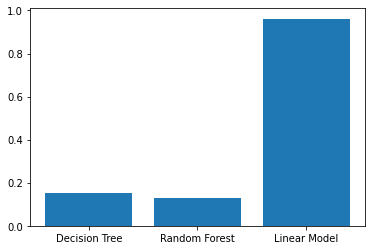

In [50]:
Models = ['Decision Tree', 'Random Forest', 'Linear Model']
Accuracy=[Decision_ACC,Randomf_ACC,test_set_r2]
plt.bar(Models, Accuracy)